<a href="https://colab.research.google.com/github/HuinaGabriela/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/blob/main/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Classificador de Imagens: Gatos vs Cachorros (com VGG16 e Fine-Tuning)

In [7]:
# Bibliotecas principais
import os
import zipfile
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img


In [8]:
# Upload e Extração do Dataset

from google.colab import files

# Upload do arquivo zip
uploaded = files.upload()

# Nome do arquivo zip enviado
zip_file = 'MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16.zip'

# Remove a pasta anterior, se existir
if os.path.exists('meu_projeto'):
    shutil.rmtree('meu_projeto')

# Extrai para a pasta desejada
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('meu_projeto')

# Verificação de conteúdo
print('Conteúdo extraído para "meu_projeto"')


Saving MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16.zip to MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16.zip
Conteúdo extraído para "meu_projeto"


In [9]:
import os

# Caminho inicial após extração
root_dir = '/content/meu_projeto'

# Percorre as subpastas e exibe a estrutura
for dirpath, dirnames, filenames in os.walk(root_dir):
    print(dirpath)


/content/meu_projeto
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/val
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/val/dogs
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/val/cats
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/train
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/train/dogs
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/train/cats
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/test
/content/

In [10]:
# Verificação do Dataset

# Exibe algumas imagens de treino

cat_dir = '/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/train/cats'
dog_dir = '/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/train/dogs'

cat_images = os.listdir(cat_dir)
dog_images = os.listdir(dog_dir)

print(f'Gatos (train): {len(cat_images)} imagens')
print(f'Cachorros (train): {len(dog_images)} imagens')

Gatos (train): 800 imagens
Cachorros (train): 800 imagens


In [11]:
# Preparação dos Dados

# Diretórios
base_dir = '/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

# Parâmetros
img_size = (224, 224)
batch_size = 16
num_classes = 2

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Geradores
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)


Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [12]:
# Construção e Treinamento do Modelo (VGG16)

# Carrega a base VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelada

# Modelo sequencial
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compila e treina o classificador (base congelada)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

print("### Treinando apenas o classificador ###")
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
### Treinando apenas o classificador ###


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1003s 10s/step - accuracy: 0.6060 - loss: 0.7484 - val_accuracy: 0.9250 - val_loss: 0.2552
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 962s 10s/step - accuracy: 0.8116 - loss: 0.4026 - val_accuracy: 0.9200 - val_loss: 0.2134
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 965s 10s/step - accuracy: 0.8694 - loss: 0.2964 - val_accuracy: 0.9100 - val_loss: 0.2080
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 958s 10s/step - accuracy: 0.8708 - loss: 0.2890 - val_accuracy: 0.9300 - val_loss: 0.1998
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 982s 10s/step - accuracy: 0.8746 - loss: 0.2759 - val_accuracy: 0.9200 - val_loss: 0.2024
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 954s 10s/step - accuracy: 0.8870 - loss: 0.2723 - val_accuracy: 0.9500 - val_loss: 0.1763
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 957s 10s/step - accuracy: 0.8884 - loss: 0.2412 - val_accuracy: 0.9350 - val_loss: 0.1793
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 958s 10s/step - accuracy: 0.9075 - loss: 0.2292 -

In [13]:
# Fine-Tuning

# Fine-tuning das últimas camadas
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

print("### Fine-tuning das últimas camadas da VGG16 ###")
history_fine = model.fit(train_generator, epochs=10, validation_data=val_generator)


### Fine-tuning das últimas camadas da VGG16 ###
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1148s 11s/step - accuracy: 0.9309 - loss: 0.1911 - val_accuracy: 0.9550 - val_loss: 0.1624
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1137s 11s/step - accuracy: 0.9369 - loss: 0.1428 - val_accuracy: 0.9450 - val_loss: 0.1743
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1145s 11s/step - accuracy: 0.9489 - loss: 0.1202 - val_accuracy: 0.9350 - val_loss: 0.1566
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1155s 12s/step - accuracy: 0.9507 - loss: 0.1165 - val_accuracy: 0.9550 - val_loss: 0.1687
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1156s 12s/step - accuracy: 0.9663 - loss: 0.0796 - val_accuracy: 0.9550 - val_loss: 0.1585
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1154s 12s/step - accuracy: 0.9750 - loss: 0.0626 - val_accuracy: 0.9350 - val_loss: 0.2076
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1143s 11s/step - accuracy: 0.9774 - loss: 0.0644 - val_accuracy: 0.9450 - val_loss: 0.2092
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━

In [22]:
try:
    model.save('vgg16_transfer_finetuned.keras')
    print("Modelo salvo com sucesso.")
except NameError:
    print("Erro: o modelo 'model' não está definido.")


Modelo salvo com sucesso.


In [15]:
# Salvamento do Modelo

model.save('vgg16_transfer_finetuned.keras')
print("Modelo salvo com sucesso.")


Modelo salvo com sucesso.


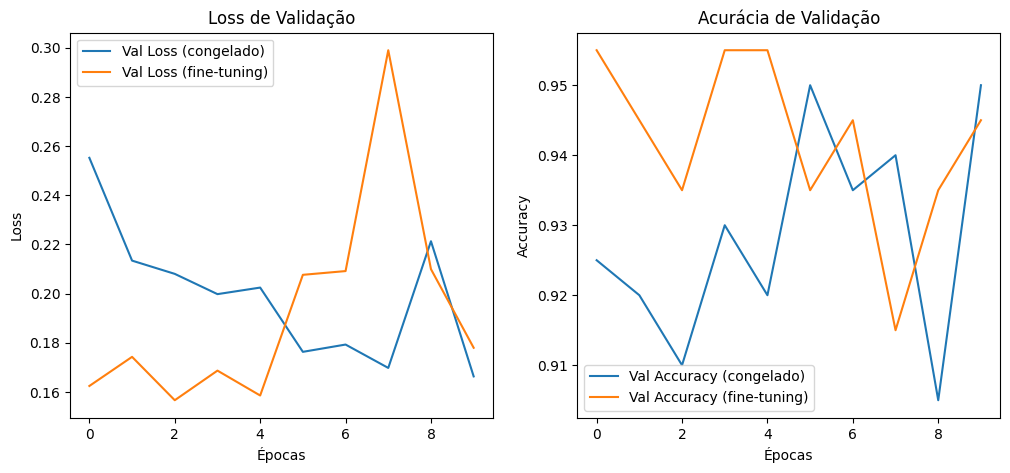

In [23]:
# Visualização dos Resultados

def plot_training(h1, h2):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(h1.history['val_loss'], label='Val Loss (congelado)')
    plt.plot(h2.history['val_loss'], label='Val Loss (fine-tuning)')
    plt.title('Loss de Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(h1.history['val_accuracy'], label='Val Accuracy (congelado)')
    plt.plot(h2.history['val_accuracy'], label='Val Accuracy (fine-tuning)')
    plt.title('Acurácia de Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_training(history, history_fine)


In [17]:
# Avaliação no Teste

loss, acc = model.evaluate(test_generator)
print(f'Test Loss: {loss:.4f} - Test Accuracy: {acc:.4f}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 105s 8s/step - accuracy: 0.9390 - loss: 0.1751
Test Loss: 0.1843 - Test Accuracy: 0.9300


In [18]:
# Predição de Novas Imagens

# Mapeamento de classes
class_indices = train_generator.class_indices
inv_class_indices = {v: k for k, v in class_indices.items()}

def prepare_image(img_path):
    img = load_img(img_path, target_size=img_size)
    x = img_to_array(img) / 255.0
    return np.expand_dims(x, axis=0)

def predict_image(img_path):
    x = prepare_image(img_path)
    preds = model.predict(x)
    class_idx = np.argmax(preds)
    class_name = inv_class_indices[class_idx]
    confidence = preds[0][class_idx]
    print(f'{img_path} → {class_name} ({confidence*100:.2f}%)')



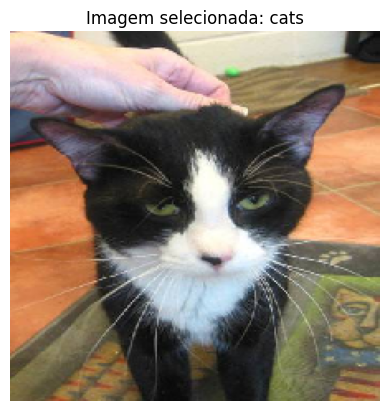

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
/content/meu_projeto/MatrizDeConfusaoDoProjetoClassificadorRapidoCNNcomVGG16/datasets/dataset/test/cats/cat.4883.jpg → cats (100.00%)


In [19]:
# validar se o modelo esta funcionando corretamente com conjunto de teste (/test)
# Seleciona aleatoriamente 'cats' ou 'dogs'
class_folder = random.choice(['cats', 'dogs'])

# Caminho da imagem aleatória dentro da pasta de teste
img_name = random.choice(os.listdir(os.path.join(test_dir, class_folder)))
img_path = os.path.join(test_dir, class_folder, img_name)

# Exibe a imagem escolhida
plt.imshow(load_img(img_path, target_size=img_size))
plt.title(f"Imagem selecionada: {class_folder}")
plt.axis('off')
plt.show()

# Predição
predict_image(img_path)


In [20]:
# Adicionado calculo da matriz de confusão

13/13 ━━━━━━━━━━━━━━━━━━━━ 105s 8s/step
Matriz de Confusão:
[[94  6]
 [ 8 92]]

Relatório de Classificação:

              precision    recall  f1-score   support

        cats       0.92      0.94      0.93       100
        dogs       0.94      0.92      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



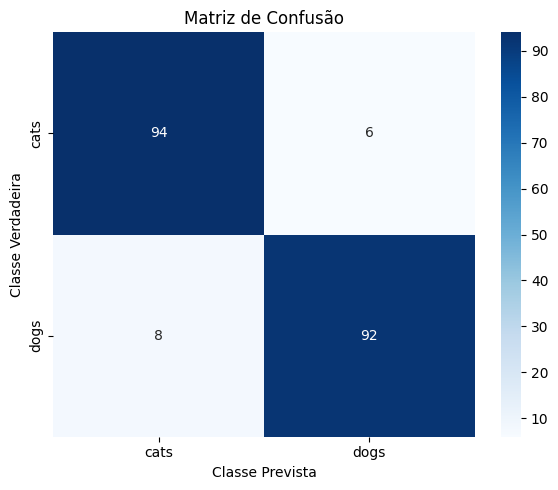

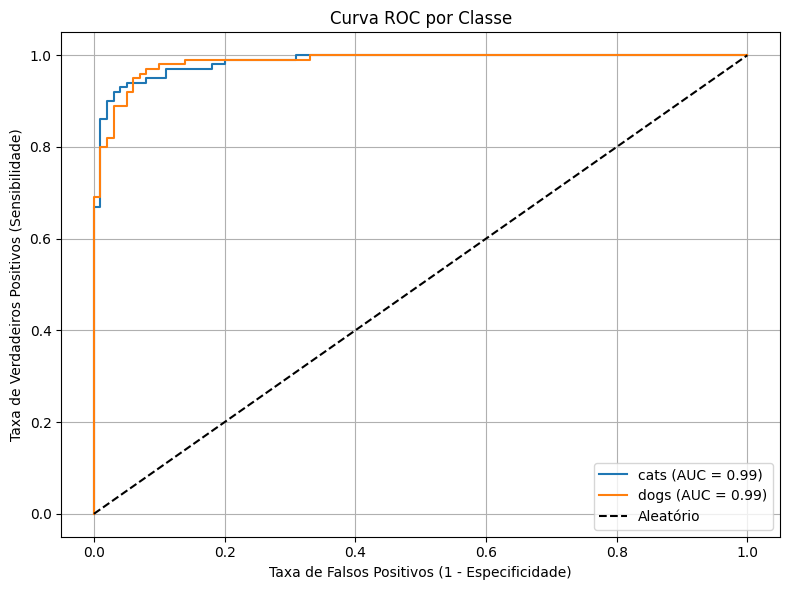

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --------------------------
# 1. OBTÉM PREDIÇÕES E RÓTULOS VERDADEIROS
# --------------------------

# Garante que o gerador de teste está na posição correta
test_generator.reset()

# Classes verdadeiras (0 = gato, 1 = cachorro)
y_true = test_generator.classes

# Probabilidades previstas para cada classe
y_pred_prob = model.predict(test_generator)

# Índice da classe com maior probabilidade => classe prevista final
y_pred = np.argmax(y_pred_prob, axis=1)

# --------------------------
# 2. MATRIZ DE CONFUSÃO
# --------------------------

cm = confusion_matrix(y_true, y_pred)
print("Matriz de Confusão:")
print(cm)

# Explicação da matriz de confusão:
# Para classe 0 (ex: gatos):
# VP = cm[0,0]  |  FN = cm[0,1]
# FP = cm[1,0]  |  VN = cm[1,1]

# --------------------------
# 3. RELATÓRIO COMPLETO: PRECISÃO, RECAL, F1, ACURÁCIA
# --------------------------

target_names = list(train_generator.class_indices.keys())
print("\nRelatório de Classificação:\n")
print(classification_report(y_true, y_pred, target_names=target_names))

# --------------------------
# 4. VISUALIZAÇÃO: MATRIZ DE CONFUSÃO COM SEABORN
# --------------------------

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

# --------------------------
# 5. CURVA ROC + AUC PARA CADA CLASSE
# --------------------------

plt.figure(figsize=(8, 6))

# Curva ROC para cada classe (gato e cachorro)
for i, class_name in enumerate(target_names):
    # Cria um vetor binário: 1 se a amostra for da classe 'i', 0 caso contrário
    fpr, tpr, _ = roc_curve(y_true == i, y_pred_prob[:, i])

    # Área sob a curva (AUC) mede o desempenho de separação
    roc_auc = auc(fpr, tpr)

    # Plota a curva
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

# Linha de referência (modelo aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')

plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC por Classe')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
